# 5.1. Bộ dữ liệu

Giả định rằng chúng ta đang xây dựng một mô hình phân loại nợ xấu. Nhãn của các quan sát sẽ bao gồm GOOD (thông thường) và BAD (nợ xấu). Kích thước của các tập dữ liệu như sau:

* Tập _huấn luyện_: 1000 hồ sơ bao gồm 900 hồ sơ GOOD và 100 hồ sơ BAD.
* Tập _kiểm tra_: 100 hồ sơ bao gồm 85 hồ sơ GOOD và 15 hồ sơ BAD.

Để thuận tiện cho diễn giải và đồng nhất với những tài liệu tham khảo khác về ký hiệu thì biến mục tiêu $y$ nhãn BAD tương ứng với giá trị 1 được gọi là dương tính (_positive_) và nhãn GOOD tương ứng với giá trị 0 được gọi là âm tính (_negative_).

Một mô hình phân loại $f$ đưa ra kết quả dự báo trên tập huấn luyện được thống kê trên bảng chéo như sau:

![](https://phamdinhkhanh.github.io/assets/images/20200813_ModelMetric/pic1.png)

Các chỉ số TP, FP, TN, FN lần lượt có ý nghĩa là :

* TP (True Positive): Tổng số trường hợp dự báo khớp mẫu _dương tính_.
* TN (True Negative): Tổng số trường hợp dự báo khớp mẫu _âm tính_.
* FP (False Positive): Tổng số trường hợp dự báo các quan sát thuộc nhãn _âm tính_ thành _dương tính_.
* FN (False Negative): Tổng số trường hợp dự báo các quan sát thuộc nhãn _dương tính_ thành _âm tính_.

Những chỉ số trên sẽ là cơ sở để tính toán những thước đo quan trọng đối với bài toán phân loại mà chúng ta sẽ tìm hiểu bên dưới. Chúng bao gồm: độ chính xác (_accuracy_), độ chuẩn xác (_precision_), độ phủ (_recall_), f1 score mà ta sẽ tìm hiểu bên dưới.

# 5.2. Độ chính xác (accuracy)

Khi xây dựng mô hình phân loại chúng ta sẽ muốn biết một cách khái quát tỷ lệ các trường hợp được dự báo đúng trên tổng số các trường hợp là bao nhiêu. Tỷ lệ đó được gọi là _độ chính xác_. _Độ chính xác_ giúp ta đánh giá hiệu quả dự báo của mô hình trên một bộ dữ liệu. _Độ chính xác_ càng cao thì mô hình của chúng ta càng tốt. _Độ chính xác_ được tính bằng tổng số trường hợp dự báo đúng trên cả _âm tính_ và _dương tính_ chia cho tổng số mẫu:

$$\text{Accuracy} = \frac{TP+TN}{\text{total sample}} = \frac{55+850}{1000} = 90.5 \%$$

Tính toán accuracy trên sklearn ta dùng module `sklearn.metrics.accuracy_score`:

In [1]:
from sklearn.metrics import accuracy_score
import numpy as np

y_label = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1])
y_pred = np.array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1])
y_prob = np.array([0.9, 0.8, 0.85, 0.1, 0.1, 0.7, 0.4, 0.75, 0.25, 0.65])

accuracy_score(y_label, y_pred)

0.5

Trong đó `y_pred` là nhãn dự báo và `y_label` là nhãn ground truth, `y_prob` là xác suất dự báo. Kết quả cho thấy có 50% số lượng các trường hợp nhãn dự báo bằng ground truth.

Trong các thước đo đánh giá mô hình phân loại thì _độ chính xác_ khá trực quan và dễ hiểu. Nó thường được dùng trong những bài toán phân loại không xảy ra mất cân bằng dữ liệu quá nghiêm trọng. Tuy nhiên với trường hợp dữ liệu mất cân bằng nghiêm trọng thì _độ chính xác_ thường rất cao và dễ khiến chúng ta ngộ nhận về chất lượng của mô hình phân loại. Một ví dụ trực quan và cũng rất thực tế đó là trong bài toán phân loại ung thư thì cứ trong 1000 mẫu chỉ có khoảng 10 mẫu là _dương tính_. Nếu một mô hình dự đoán kết quả toàn bộ 1000 mẫu đều là _âm tính_ sẽ có độ chính xác đạt 99% trong khi mô hình không phát hiện được trường hợp ung thư nào. Chúng ta thường nhìn vào con số 99% và mắc sai lầm nghiêm trọng rằng mô hình có độ chính xác rất cao trong khi bản chất mô hình là kém.

Ngoài ra hạn chế của độ chính xác chỉ đo lường trên **tất cả** các nhãn mà không quan tâm đến từng nhãn. Do đó nó không phù hợp để đánh giá những tác vụ mà **tầm quan trọng** của việc dự báo các nhãn không còn như nhau. Hay cụ thể hơn, như trong ví dụ phân loại nợ xấu, việc chúng ta phát hiện đúng một hồ sơ nợ xấu quan trọng hơn việc chúng ta phát hiện đúng một hồ sơ thông thường.

Khi đó chúng ta sẽ quan tâm hơn tới độ chính xác nhưng được đo lường chỉ **trên nhãn BAD** hơn và sẽ cần những _thước đo_ như độ chuẩn xác (_precision_), độ phủ (_recall_) đánh giá chuyên biệt trên nhóm này. Cùng tìm hiểu về các thước đo này bên dưới.

# 5.3. Độ chuẩn xác (_precision_)

_Độ chuẩn xác_ trả lời cho câu hỏi trong các trường hợp được dự báo là _dương tính_ thì có bao nhiêu trường hợp là đúng ? Và tất nhiên _độ chuẩn xác_ càng cao thì mô hình của chúng ta càng tốt trong việc phân loại hồ sơ BAD. Công thức của _độ chuẩn xác_ được tính trên nhóm _dương tính_ như sau:

$$\text{Precision} = \frac{TP}{\text{total predicted positive}} = \frac{TP}{TP+FP} = \frac{55}{55+50} = 52.4 \%$$

Trong ví dụ trên _độ chuẩn xác_ đạt 52.4% có ý nghĩa rằng trong các hồ sơ được dự báo là BAD thì có 52.4% các hồ sơ được dự báo đúng.

Cũng có ý nghĩa gần tương tự như _độ chuẩn xác_, có cùng tử số nhưng có một chút khác biệt về mẫu số trong công thức tính toán, và cũng là một chỉ số giúp đo lường hiệu suất dự báo trên nhóm _dương tính_, đó là _độ phủ_ (recall).

# 5.4. Độ phủ (_Recall_)

_Độ phủ_ đo lường tỷ lệ dự báo chính xác các trường hợp _dương tính_ trên toàn bộ các mẫu thuộc nhóm _dương tính_. Công thức của recall như sau:

$$\text{Recall} = \frac{TP}{\text{total actual positive}} = \frac{TP}{TP+FN} = \frac{55}{55+45}=55 \%$$

Để tính được _độ phủ_ thì chúng ta phải biết trước nhãn của dữ liệu. Do đó _độ phủ_ có thể được dùng để đánh gía trên tập huấn luyện và thẩm định vì chúng ta đã biết trước nhãn. Trên những tập dữ liệu chưa được gán nhãn thì chúng ta sẽ chỉ có thể đánh giá được _độ chuẩn xác_ mà không đánh giá được _độ phủ_.

Tính toán _độ chuẩn xác_ và _độ phủ_ trên sklearn chúng ta sẽ dựa trên ground truth `y_label` và xác suất dự  báo `y_prob`:

In [2]:
from sklearn.metrics import precision_recall_curve
prec, rec, thres = precision_recall_curve(y_label, y_prob)

# 5.5. Trade off giữa _độ chuẩn xác_ và _độ phủ_

Thông thường các mô hình phân loại nhị phân sẽ lựa chọn một ngưỡng mặc định là 0.5 để quyết định nhãn. Tức là nếu ta có một hàm phân loại $f_{\theta}()$ thì nhãn dự báo sẽ dựa trên độ lớn của xác suất dự báo như sau:

$$
\begin{equation}
            \left\{
              \begin{array}{l l}
                f_{\theta}(x) \geq 0.5, \text{label} = 1\\
                f_{\theta}(x) < 0.5, \text{label} = 0
              \end{array} \right.
            \end{equation}
$$

Do đó _độ chuẩn xác_ và _độ phủ_ sẽ không cố định mà chịu sự biến đổi theo ngưỡng xác suất được lựa chọn. Bên dưới là một đồ thị minh họa cho sự biến đổi này. Đồ thị được trích từ [home credit kaggle kernel - phamdinhkhanh](https://www.kaggle.com/phamdinhkhanh/home-credit-default-risk).

![](https://phamdinhkhanh.github.io/assets/images/20200813_ModelMetric/pic2.png)

Thậm chí bằng một chút suy luận logic, ta còn có thể chứng minh được mối quan hệ giữa _độ chuẩn xác_ và _độ phủ_ khi biến đổi theo ngưỡng threshold là mối quan hệ đánh đổi (_trade-off_). Khi _độ chuẩn xác_ cao thì _độ phủ_ thấp và ngược lại. Thật vậy :

* Giả sử trong ví dụ về phân loại nợ xấu, chúng ta muốn khi mô hình dự báo một hồ sơ là BAD thật chắc chắn nên lựa chọn một ngưỡng threshold cao hơn, chẳng hạn như 0.9. Khi đó một hồ sơ được dự báo là BAD thì khả năng rất cao là hồ sơ đó sẽ đúng là BAD bởi xác suất 90% là một mức tin cậy khá cao. Đồng thời mật độ của các hồ sơ BAD thực tế sẽ tập trung nhiều về bên phải, ở những khoảng xác suất cao và thấp hơn ở những khoảng xác suất thấp. Điều đó dẫn đến nâng cao ngưỡng threshold thì tỷ lệ rất cao những hồ sơ được dự báo là BAD sẽ chính là BAD và suy ra _độ chuẩn xác_ cao hơn. Ở một khía cạnh khác nâng cao ngưỡng threshold sẽ làm giảm số lượng các trường hợp là True Positive nên làm giảm _độ phủ_.

* Trong trường hợp chúng ta muốn nới lỏng kết quả phân loại hồ sơ BAD một chút bằng cách giảm ngưỡng threshold. Trong tình huống này, số lượng hợp đồng BAD được dự báo đúng sẽ tăng lên và dẫn tới tăng _độ phủ_. Tuy nhiên số lượng hồ sơ được dự báo là BAD mà đúng tăng lên chậm hơn so với tốc độ tăng của số lượng hồ sơ được dự báo là BAD. Điều đó dẫn tới _độ chuẩn xác_ giảm.

Sự đánh đổi giữa _độ chuẩn xác_ và _độ phủ_ khiến cho kết quả của mô hình thường là: _độ chuẩn xác_ cao, _độ phủ_ thấp hoặc _độ chuẩn xác_ thấp, _độ phủ_ cao. Khi đó rất khó để lựa chọn đâu là một mô hình tốt vì không biết rằng đánh giá trên _độ chuẩn xác_ hay _độ phủ_ sẽ được ưu tiên hơn. Chính vì vậy chúng ta sẽ tìm cách kết hợp cả hai trong một thước đo mới, đó chính là f1 score.

# 5.6. f1 Score

$f_1$ Score là trung bình điều hòa giữa _độ chuẩn xác_ và _độ phủ_. Do đó nó là chỉ số đại diện trong việc đánh giá tỷ lệ dự báo đúng của các trường hợp mẫu _dương tính_ (hồ sơ BAD).

$$\text{f}_1 = \frac{2}{\text{precision}^{-1}+\text{recall}^{-1}} = \frac{2}{0.524^{-1} + 0.55^{-1}} = 53.7 \%$$

Trong trường hợp $\text{precision}=0$ hoặc $\text{recall}=0$ ta qui ước $\text{f}_1 = 0$.

Ta chứng minh được rằng giá trị của $f_1$ score luôn nằm trong khoảng của _độ chuẩn xác_ và _độ phủ_. Thật vậy :

$$ \begin{eqnarray} \text{F}_1 & = & \frac{2~\text{precision}\times\text{recall}}{\text{precision}+\text{recall}} \\
& \leq & \frac{2~\text{precision}\times\text{recall}}{2~\min(\text{precision}, \text{recall})} = \max(\text{precision}, \text{recall})
\end{eqnarray}$$

Tương tự:

$$ \begin{eqnarray} \text{F}_1 & = & \frac{2~\text{precision}\times\text{recall}}{\text{precision}+\text{recall}} \\
& \geq & \frac{2~\text{precision}\times\text{recall}}{2~\max(\text{precision}, \text{recall})} = \min(\text{precision}, \text{recall})
\end{eqnarray}$$

Do đó đối với những trường hợp mà _độ chuẩn xác_ và _độ phủ_ quá chênh lệch thì $f_1$ score sẽ cân bằng được cả hai giá trị này và giúp ta đưa ra một đánh giá khách quan hơn. Ví dụ như kết quả bảng bên dưới :

![](https://phamdinhkhanh.github.io/assets/images/20200813_ModelMetric/pic3.png)

Nếu dựa trên _độ chuẩn xác_ thì giá trị precision=91.6% cho thấy đây là một model _khá tốt_. Tuy nhiên trong 100 trường hợp positive thì mô hình chỉ nhận diện được đúng 55 trường hợp nên xét theo _độ phủ_ thì recall=55% cho thấy đây không phải là một mô hình tốt. Trong trường hợp này $f_1$ sẽ được sử dụng như một chỉ số đại diện cho cả hai. Điểm $f_1$ bằng 69% cho thấy đây là một mô hình có sức mạnh ở mức trung bình và đánh giá của chúng ta sẽ xác thực hơn so với việc quá lạc quan vào mô hình khi chỉ nhìn vào _độ chuẩn xác_ hoặc quá bi quan nếu chỉ dựa vào _độ phủ_.

Trên sklearn, $f_1$ score được tính như sau :

In [3]:
from sklearn.metrics import f1_score
f1_score(y_label, y_pred)

0.5454545454545454

Trong đó y_label là nhãn của dữ liệu và y_pred là nhãn dự báo. 

# 5.7. Tại sao f1 score không là trung bình cộng _độ chuẩn xác_ và _độ phủ_

Khi đưa ra công thức của $f_1$ score, chúng ta thường thắc mắc rằng tại sao $f_1$ score không được tính bằng trung bình cộng giữa _độ chuẩn xác_ và _độ phủ_? Chúng ta sẽ có câu trả lời thông qua việc lấy ví dụ trực quan trong trường hợp mô hình của bạn có _độ chuẩn xác_ quá thấp và _độ phủ_ quá cao, chẳng hạn precision=0.01 và recall=1.0. 

Nhìn vào biểu đồ trade-off giữa precision và recall thì đây có thể được xem như một mô hình thiết lập threshold thấp. 
Nó tương đương với việc dự đoán ngẫu nhiên toàn bộ là _dương tính_. Do đó không thể xem đó là một mô hình tốt. 

Nếu sử dụng công thức trung bình thì 

$$\text{F}_1 = \frac{\text{precision+recall}}{2} = 0.5005$$ 

giá trị này cho thấy đây là một mô hình ở mức trung bình. Trong khi sử dụng công thức trung bình điều hòa thì 

$$\text{F}_1 = \frac{2~\text{precision}\times\text{recall}}{\text{precision}+\text{recall}} \approx 0$$ 

giá trị này giúp nhận diện được mô hình không tốt.

Tóm lại sử dụng trung bình điều hòa sẽ phạt nặng hơn những trường hợp mô hình có _độ chuẩn xác_ thấp, _độ phủ_ cao hoặc _độ chuẩn xác_ cao, _độ phủ_ thấp. Đây là những trường hợp tương đương với dự báo thiên về một nhóm là _dương tính_ hoặc _âm tính_ nên không phải là mô hình tốt. Điểm số từ trung bình điều hòa sẽ giúp ta nhận biết được những trường hợp không tốt như vậy.

# 5.8. Độ chính xác (_accuracy_) và _f1 score_

_Độ chính xác_ và _f1 score_ đều được sử dụng để đánh giá hiệu suất của mô hình phân loại. Vậy trong tình huống nào chúng ta nên sử dụng chỉ số nào là phù hợp? Điều đó phụ thuộc vào bộ dữ liệu của bạn có xảy ra hiện tượng mất cân bằng hay không ? Hãy cùng quay trở lại phân tích bảng kết quả đầu tiên. Ta gọi trường hợp này là dự báo theo _mô hình_ :

![](https://phamdinhkhanh.github.io/assets/images/20200813_ModelMetric/pic4.png)

Khi dự báo theo _mô hình_ dễ dàng tính được accuracy=90.5%, đây là một kết quả cũng khá cao và chúng ta nhận định rằng mô hình phân loại tốt.

Tuy nhiên xét tình huống chúng ta dự báo _ngẫu nhiên_ toàn bộ mẫu là các hồ sơ GOOD. Như vậy độ chính xác đạt được thậm chí đã lên tới 90%. Lúc này chúng ta nghi ngờ sự phù hợp của _độ chính xác_ trong việc đánh giá mô hình vì không cần tới mô hình cũng tạo ra một kết quả gần như tương đương với có mô hình.

Mặt khác, khi sử dụng $f_1$ score thì ta thu được điểm số khi dự báo _ngẫu nhiên_ là 0% và khi dự báo theo _mô hình_ là 69% (bạn đọc hãy tự tính). Các bạn đã thấy sự chênh lệch điểm số $f_1$ score giữa hai mô hình chưa ? Đồng thời $f_1$ score cũng không khiến chúng ta lạc quan vào những mô hình có chất lượng thấp như khi sử dụng _độ chính xác_. Bên cạnh đó, $f_1$ score chỉ tính toán trên nhóm _dương tính_, thường là nhóm thiểu số mà chúng ta quan tâm hơn trong trường hợp mất cân bằng dữ liệu. Do đó nó sẽ phù hợp hơn _độ chính xác_ được tính toán trên đồng thời hai nhóm _âm tính_ và _dương tính_.

# 5.9. AUC

ROC là đường cong biểu diễn khả năng phân loại của một mô hình phân loại tại các ngưỡng threshold. Đường cong này dựa trên hai chỉ số : 

* TPR (true positive rate): Chỉ số này chính bằng _độ phủ_. Một số tài liệu thống kê còn gọi chúng là _độ nhạy_ (_sensitivity_). Đây là tỷ lệ các trường hợp phân loại đúng _dương tính_ trên tổng số các trường hợp thực tế là _dương tính_. Nó có tác dụng đánh giá mức độ dự báo chính xác của mô hình trên nhóm _dương tính_. Khi giá trị của nó càng cao, mô hình dự báo càng tốt **trên nhóm _dương tính_**. Nếu $\text{TPR}=0.9$, chúng ta tin rằng 90% các mẫu thuộc nhóm _dương tính_ đã được mô hình phân loại đúng.

$$\text{TPR}\text{/recall}\text{/sensitivity} = \frac{TP}{\text{total positive}}$$

* FPR (false positive rate): Tỷ lệ dự báo sai các trường hợp thực tế là _âm tính_ thành thành _dương tính_ trên tổng số các trường hợp thực tế là _âm tính_. Nếu giá trị của $\text{FPR}=0.1$, mô hình đã dự báo sai 10% trên tổng số các trường hợp là _âm tính_. Một mô hình có FPR càng thấp thì mô hình càng chuẩn xác vì sai số của nó **trên nhóm _âm tính_** càng thấp. Phần bù của FPR là _độ đặc hiệu_ (_specificity_) đo lường tỷ lệ dự báo đúng các trường hợp _âm tính_ trên tổng số các trường hợp thực tế là _âm tính_.

$$\text{FPR} = 1-\text{specificity}= \frac{FP}{\text{total negative}}$$

Đồ thị ROC là một đường cong cầu lồi dựa trên TPR và FPR có hình dạng như bên dưới:

![](https://phamdinhkhanh.github.io/assets/images/20200813_ModelMetric/pic5.jpeg)

AUC là chỉ số được tính toán dựa trên đường cong ROC (receiving operating curve) nhằm **đánh giá khả năng phân loại** của mô hình tốt như thế nào ? Phần diện tích gạch chéo nằm dưới đường cong ROC và trên trục hoành là AUC (area under curve) có giá trị nằm trong khoảng [0, 1]. Khi diện tích này càng lớn thì đường cong ROC có xu hướng tiệm cận đường thẳng $y=1$ và khả năng phân loại của mô hình càng tốt. Khi đường cong ROC nằm sát với đường chéo chính đi qua hai điểm (0, 0) và (1, 1), mô hình sẽ tương đương với một phân loại ngẫu nhiên. Trường hợp đường cong ROC nằm dưới đường chéo chính thể hiện rằng mô hình có chất lượng kém và thậm chí thua xa một dự báo ngẫu nhiên.


AUC được tính toán như sau:

In [4]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thres = roc_curve(y_label, y_pred)
# Tính toán auc
auc(fpr, tpr)

0.5

Biểu diễn đường cong ROC:

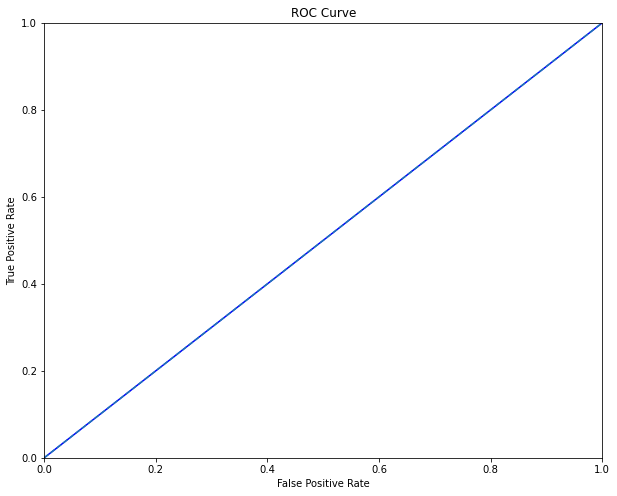

In [5]:
import matplotlib.pyplot as plt

def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres)

# 5.10. Mối quan hệ giữa TPR và FPR

TPR và FPR sẽ có mối quan hệ cùng chiều. Thật vậy, chúng ta sẽ cùng diễn giải điều này qua hình vẽ bên dưới.

![](https://phamdinhkhanh.github.io/assets/images/20200813_ModelMetric/pic6.jpeg)

**Hình 1:** Đồ thị phân phối của mật độ xác suất (probability densitiy function - pdf) của điểm số nhóm _âm tính_ bên trái và nhóm _dương tính_ bên phải. Mô hình sẽ căn cứ vào đường thẳng threshold vuông góc với trục hoành ($y$) để  đưa ra dự báo là _dương tính_ hay _âm tính_. Nếu điểm số nằm bên trái threshold thì sẽ được dự báo là _âm tính_ và nằm bên phải được dự báo là _dương tính_. Như vậy trên hình vẽ, phần diện tích $FP$ sẽ là _sai dương tính_ (_false positive rate_) và phần diện tích $TP$ sẽ là _true positive rate_ (đúng dương tính). Khi ta dịch chuyển ngưỡng threshold từ trái sang phải thì các phần diện tích $FP$ và $TP$ sẽ cùng tăng dần. Điều này tương ứng với mối quan hệ giữa TPR và FPR là đồng biến theo sự thay đổi của threshold.

Bây giờ bạn đã hiểu tại sao đường cong ROC lại là một đường đồng biến rồi chứ ?

Ngoài ra mô hình của chúng ta sẽ càng tốt nếu đồ thị phân phối xác suất của _dương tính_ và _âm tính_ có sự tách biệt càng lớn. Khi đó phần diện tích chồng lấn giữa hai phân phối càng nhỏ và mô hình giảm thiểu tỷ lệ dự báo nhầm. Đồng thời các phân phối xác suất giữa _âm tính_ và _dương tính_ càng cách xa nhau thì đồ thị ROC càng lồi. Tính chất lồi của ROC được thể hiện qua độ lớn của phần diện tích AUC.

# 5.11. Gini và CAP

Gini là một thước đo khá hiệu quả trong việc đo lường bất bình đẳng thu nhập trong dân số học. Ngoài ra, trong lĩnh vực rủi ro tín dụng (_credit risk_), các mô hình scorecard thường sử dụng hệ số Gini làm thước đo đánh giá sức mạnh phân loại của các mô hình. Hệ số này cho thấy khả năng một hồ sơ sẽ vỡ nợ trong tương lai được nhận biết từ mô hình là bao nhiêu phần trăm. Một mô hình scorecard càng mạnh thì hệ số Gini càng cao và phân phối điểm số của hai nhóm GOOD và BAD sẽ càng khác biệt. Giá trị của Gini nằm giao động trong khoảng [0, 1].

Một hệ số khác tương tự như Gini đó là **CAP** (_Cumulative Accuracy Profile_). Hệ số này được tính toán dựa trên đường cong CAP có biểu diễn như hình bên dưới:

![](https://imgur.com/pQTY1UR.jpeg)

**Hình 2** Hệ số CAP và đường cong CAP của mô hình scorecard. Trên đồ thị, trục hoành biểu diễn tỷ lệ phần trăm tích lũy của số lượng hồ sơ vay và trục tung biểu diễn phần trăm tích lũy của số lượng hồ sơ vay của nhóm BAD được thống kê từ phần trăm mẫu được rút ra tương ứng trên trục hoành. Các hồ sơ sẽ được sắp xếp theo điểm số giảm dần. Đầu tiên chúng ta sẽ lấy ra một tỷ lệ $x$% hồ sơ có điểm số cao nhất tương ứng với điểm $x$ trên trục hoành. Từ mẫu $x$% này, chúng ta thống kê được $y$% tỷ lệ các hồ sơ BAD được phát hiện. Sau đó gia tăng dần kích thước mẫu tích lũy ta sẽ thu được đường CAP như đường _curent model_ trên hình vẽ. 

Trên hình vẽ chúng ta có 3 đường cong CAP đó là _perfect model, current model, random model_ lần lượt tương ứng với các mô hình hoàn hảo (_perfect model_), model hiện tại và model ngẫu nhiên. Mô hình hoàn hảo là mô hình phân loại một cách hoàn toàn các hồ sơ nợ xấu. Đường CAP của mô hình hoàn hảo sẽ tiệm cận với đường thẳng $y=1$ cho thấy rằng chúng ta có thể lựa chọn một ngưỡng điểm nào đó nằm giữa (0, 1) sao cho mô hình phân loại được 100% các trường hợp vỡ nợ. Mô hình hoàn hảo rất ít khi đạt được trên thực tế và nếu có một mô hình gần tiệm cận với đường thẳng $y=1$ thì đó là một mô hình rất rất tốt. 

Đối lập với đường CAP hoàn hảo là đường CAP ngẫu nhiên. Đường CAP này biểu diễn kết quả của một sự phân loại ngẫu nhiên các nhãn BAD nên tỷ lệ hồ sơ BAD phân phối đều trên toàn miền điểm số. Do đó hình dạng của đường CAP ngẫu nhiên sẽ tiệm cận với đường chéo chính đi qua (0, 0) và (1, 1). 

**Tại sao phân phối xác suất tích lũy của BAD lại là một đường cong lồi ?**

* Giả sử chúng ta lựa chọn tập mẫu $S$ gồm $x$% quan sát có điểm _cao nhất_ (lưu ý là các quan sát đã được sắp xếp theo điểm số giảm dần). Do BAD có phân phối chủ yếu tập trung vào nhóm có điểm số cao nên tỷ lệ các hồ sơ được dự báo BAD trên tổng số hồ sơ nhãn BAD trong $S$ sẽ lớn hơn tỷ lệ tích lũy các quan sát $x$%. Tỷ lệ này đồng thời cũng chính là TPR (_true positive rate_) trên $S$.

* Ở những $x$% cao thì các quan sát được thêm vào có điểm số nhỏ dần và do đó tốc độ tăng của $TPR$ giảm dần. Do đó đường CAP của mô hình hiện tại có hình dạng là một đường cong lồi.

**Công thức CAP:**

Hầu hết các mô hình có hình dạng của đường cong CAP tương tự như đường `current model`. Tức là nằm giữa đường CAP hoàn hảo và CAP ngẫu nhiên. Một mô hình càng tốt nếu đường CAP của nó càng gần đường hoàn hảo và khi đường CAP càng gần đường ngẫu nhiên thì kết quả dự báo của mô hình càng kém. Chỉ số CAP sẽ được tính toán dựa trên phần diện tích A, B nằm giữa các đường CAP hoàn hảo, hiện tại và ngẫu nhiên như trên hình vẽ theo công thức:

$$\text{CAP}=\frac{A}{A+B}$$

**Visualize đường cong CAP như thế nào ?**

Để vẽ đường cong CAP chúng ta lần lượt thực hiện các bước sau:

* B1: Sắp xếp xác suất vỡ nợ được dự báo theo thứ tự _giảm dần_ và chia nó thành 10 phần (_decile_) với số lượng quan sát đều nhau. Bạn cũng có thể lựa chọn chia thành 15, 20 phần, tùy theo kích thước tập kiểm tra lớn hay nhỏ. Cách phân chia này sẽ xếp hạng những người vay rủi ro nhất có nhóm xếp hạng (_rating grade_) thấp nhất và những người vay an toàn nhất có nhóm xếp hạng cao nhất.

* B2: Tính số người vay trong mỗi nhóm (cột _number of borrowers_).

* B3: Tính số lượng khách hàng nợ xấu trong mỗi nhóm (cột _number of bads_).

* B4: Tính số lượng khách hàng nợ xấu tích lũy trong mỗi nhóm (cột _cumulative bads_). Nợ xấu tích lũy của một nhóm xếp hạng thứ $i$ sẽ bằng tổng nợ xấu của các nhóm xếp hạng trước đó từ $1,2, \dots$ cho tới $i$.

* B5: Tính tỷ lệ phần trăm khách hàng nợ xấu trong mỗi nhóm (cột _% of bads_) có giá trị bằng cột _number of bads_ chia cho tổng số lượng hồ sơ BAD.

* B6: Tính tỷ lệ phần trăm tích lũy của khách hàng nợ xấu trong mỗi phần (cột _cumulative % of bads_) được tính dựa trên tổng tích lũy của cột _% of bads_.

![](https://imgur.com/61QDFzn.jpeg)

Khi đó chúng ta sẽ thu được cột cuối cùng tương ứng với giá trị trục tung của đường cong CAP tại các điểm giá trị 10% liên tiếp của trục hoành.

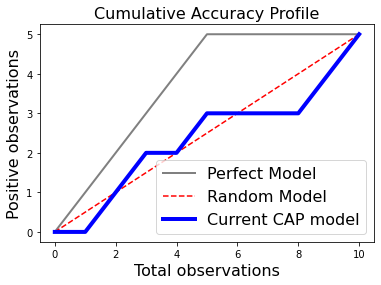

In [6]:
# 1. Đường cong perfect model
# Số lượng quan sát nhãn positive
no_positive = np.sum(y_label)
# Số lượng quan sát
total = len(y_label)

plt.plot([0, no_positive, total], 
         [0, no_positive, no_positive], 
         c = 'grey', 
         linewidth = 2, 
         label = 'Perfect Model')

# 2. Đường cong ngẫu nhiên 

plt.plot([0, total], 
	 [0, no_positive], 
	 c = 'r', linestyle = '--', label = 'Random Model')

# 3. Đường cong CAP của mô hình hiện tại
# Sắp xếp nhãn y_label theo thứ tự xác suất giảm dần 
y_label_sorted = [y for _, y in sorted(zip(y_prob, y_label))]
# Tổng lũy kế số lượng các quan sát positive theo xác suất giảm dần
y_values = np.append([0], np.cumsum(y_label_sorted))
# Tổng lũy kế số lượng các quan sát
x_values = np.arange(0, total + 1)
# Đường CAP của current model
plt.plot(x_values, 
         y_values, 
         c = 'b',
         label = 'Current CAP model', 
         linewidth = 4)

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Positive observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)


**Đường cong Lorenz và hệ số Gini**

Đường cong Lorenz được sử dụng để mô tả sự bất bình đẳng trong phân phối giữa GOOD và BAD. Ý nghĩa của nó tương tự như đường cong CAP. Nhưng chúng ta sẽ thay phân phối tích lũy của số lượng mẫu bằng phân phối tích lũy của GOOD. Đồ thị của đường cong Lorenz có hình dạng như bên dưới :

![](https://i.imgur.com/MLX7gtx.jpeg)

Hệ số Gini thể hiện mức độ cải thiện của mô hình trong khả năng phân loại GOOD và BAD so với mô hình ngẫu nhiên. Giá trị của hệ số Gini được tính bằng diện tích :

$$\text{gini} = \frac{B}{A+B} = 2B$$ 

khai triển đẳng thức sau cùng được suy ra từ  diện tích $A+B = 0.5$

**Mối liên hệ giữa Gini và AUC**

Ngoài ra chúng ta còn có mối liên hệ giữa hệ số Gini và AUC theo phương trình sau:

$$\text{gini} = 2 \text{AUC} - 1$$

![](https://imgur.com/6dvnG3g.jpeg)


Thật vậy, nếu chúng ta thể hiện trên đồ thị đồng thời đường cong ROC và Lorenz thì hai đường này sẽ trùng nhau. Giả sử $A$ là phần diện tích nằm dưới đường thẳng $y=1$ và nằm trên đường cong ROC, $B$ là phần diện tích nằm trên đường chéo chính và dưới đường cong ROC. Khi đó ta sẽ nhận thấy rằng:

$$\text{gini} = 2*B$$

$$\text{AUC} = B+0.5$$

Do đó 

$$\text{gini} = 2\times \text{AUC}-1$$

# 5.12. Tổng kết 

Như vậy qua bài viết này các bạn đã nắm trong tay khá nhiều các chỉ số để đánh giá mô hình phân loại trong machine learning. Đây là những kiến thức cơ bản nhưng lại rất quan trọng mà chúng ta cần phải nắm vững để lựa chọn được mô hình tốt nhất. Đồng thời chúng ta không chỉ biết cách áp dụng mà còn hướng tới hiểu sâu về công thức và ý nghĩa thực tiễn của từng chỉ số. Chúng ta cùng tổng kết lại các chỉ số đã được học:

* Độ chính xác
* Độ chuẩn xác
* Độ nhạy
* f1 score
* AUC
* Gini
* Đường cong ROC
* Đường cong Lorenz

# 5.13. Bài tập

1. Độ chính xác là gì? Độ chuẩn xác là gì ? Độ nhạy là gì ?
2. Khi nào thì nên dùng độ chính xác và khi nào thì nên dùng $f_1$ score.
3. Tại sao $f_1$ score lại sử dụng công thức trung bình điều hoà thay cho trung bình cộng giữa độ nhạy và độ chuẩn xác.
4. Đường cong ROC được vẽ như thế nào? Các trường hợp ROC lồi, lõm và tiệm cận đường chéo chính có ý nghĩa gì ?
5. Đường cong Lorenz và hệ số Gini có ý nghĩa gì?
6. Bạn đang cần xây dựng một mô hình dự báo xác suất vỡ nợ từ bộ dữ liệu [german-credit](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)). Hãy phân tích bộ dữ liệu này và lựa chọn ra đâu là thước đo phù hợp cho bài toán phân loại trên bộ dữ liệu này?
7. Xây dựng mô hình trên tập huấn luyện và tính toán các thước đo ở câu 6 trên tập huấn luyện và kiểm tra.
8. Vẽ các biểu đồ về đường cong ROC, đường cong Lorenz trên các tập huấn luyện và kiểm tra.
9. Viết một báo cáo giải thích kết quả thu được từ việc huấn luyện mô hình.
10. Đưa ra khuyến nghị về phẩm chất của mô hình? Có nên áp dụng chúng vào thực tiễn hay không?

# 5.14. Tài liệu tham khảo

1. [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
2. [Trade off precision and recall - Andrew Ng](https://www.youtube.com/watch?v=W5meQnGACGo)
3. [Receiver Operating Characteristic (ROC) with cross validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py)
4. [Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
5. [gini cumulative accuracy profile auc](https://www.listendata.com/2019/09/gini-cumulative-accuracy-profile-auc.html)
6. [Classification Accuracy is Not Enough: More Performance Measures You Can Use](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)